# Análisis del dataset de Vivanda

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
filecsv = 'productos_20241113-144012.csv'
df = pd.read_csv(filecsv, sep=',', low_memory=False)

In [2]:
df.shape

(13829, 34)

In [3]:
campos = ['product_id', 'product_name', 'brand', 'brand_id', 'brand_image_url', 'category_id', 'product_title', 'metatag_description', 'categories_text', 'categories_ids', 'link', 'vendido_por', 'descripcion_producto', 'presentacion', 'presentacion_empaque', 'pack', 'porcion_sugerida', 'azucares_porcion', 'carbohidratos_porcion', 'descripcion_nutricional', 'grasas_porcion', 'advertencias_consumo', 'item_id', 'ean', 'image_url', 'value', 'is_available', 'available_quantity', 'price', 'list_price', 'price_without_discount', 'price_valid_until', 'created', 'product_uri_json']

df.columns = campos

## Eliminar columnas que no se utilizarán
1. product_id
2. brand
3. brand_id
4. brand_image_url
5. category_id
6. metatag_description
7. categories_ids
8. item_id
9. ean
10. is_available
11. price_valid_until
12. created
13. product_uri_json
14. price_without_discount
15. list_price

In [4]:
df.drop(['product_id', 'product_title','brand', 'brand_id', 'brand_image_url', 'category_id', 'metatag_description', 'categories_ids', 'item_id', 'ean', 'is_available',  'pack', 'presentacion', 'presentacion_empaque', 'porcion_sugerida',  'azucares_porcion',  'carbohidratos_porcion', 'image_url','descripcion_nutricional', 'grasas_porcion', 'advertencias_consumo', 'price_valid_until', 'created', 'product_uri_json', 'price_without_discount', 'available_quantity','value', 'list_price', 'vendido_por'], axis=1, inplace=True)

df.columns.to_list()

['product_name', 'categories_text', 'link', 'descripcion_producto', 'price']

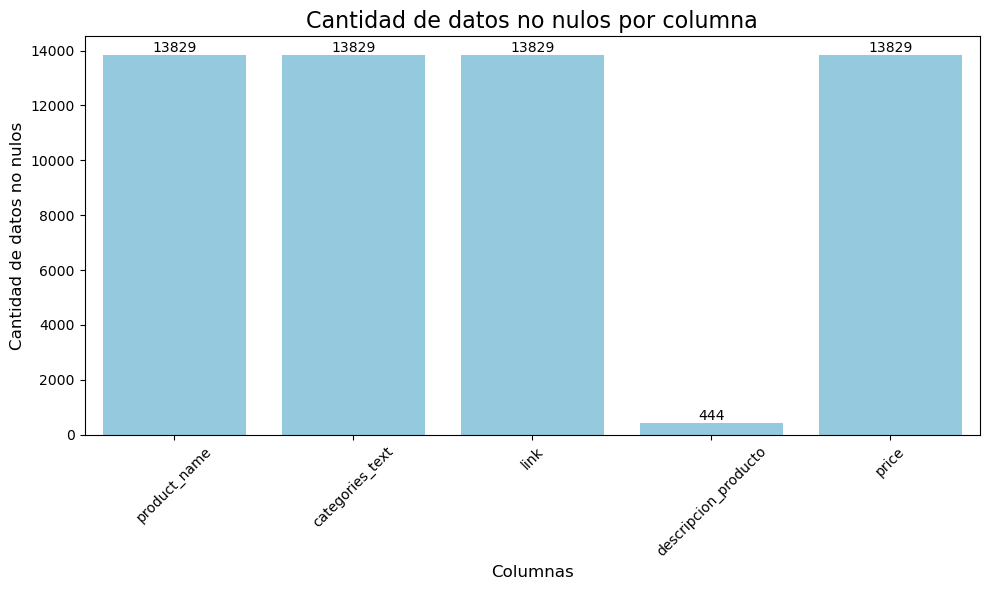

In [5]:
# Calcular la cantidad de datos no nulos por columna
non_null_counts = df.notnull().sum()

# Convertirlo en un DataFrame para facilitar el trabajo con Seaborn
non_null_df = non_null_counts.reset_index()
non_null_df.columns = ['Column', 'NonNullCount']

# Crear el gráfico
plt.figure(figsize=(10, 6))
ax = sns.barplot(data=non_null_df, x='Column', y='NonNullCount', color='skyblue')  # Cambiamos `palette` por `color`

# Mostrar valores en las barras
for i in ax.containers:
    ax.bar_label(i, fmt='%d', label_type='edge')

plt.title('Cantidad de datos no nulos por columna', fontsize=16)
plt.xlabel('Columnas', fontsize=12)
plt.ylabel('Cantidad de datos no nulos', fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### La columna "descripcion_producto" tiene solo 9% de información

## Limpieza de datos

In [6]:
marketplace = 'Vivanda'
df['descripcion_producto'] = df['descripcion_producto'].fillna(marketplace)
df['source'] = marketplace

In [7]:
def clean_categories(texto: str)-> str:
    categories = texto.replace('[', '').replace(']', '').replace("'", '')
    categories = categories.replace('/', ',').replace(',,', ',')
    categories = categories.replace(', ,', ',')
    return categories

def categories_to_list(texto: str)-> list:
    lista = list(dict.fromkeys(texto.split(',')))
    lista_limpia = list(filter(lambda x: x != '', lista))
    return lista_limpia
    
df['categories2'] = df['categories_text'].apply(clean_categories)
df['categories'] = df['categories2'].apply(categories_to_list)
df.drop(['categories_text', 'categories2'], axis=1, inplace=True)

In [8]:
import re

reemplazar = ['Importante destacar', 'Descripción del producto']

eliminar  = ['¡Conoce las distintas opciones', 
             'Otro punto importante es', 
             '¡Realiza tus combinaciones', 
             'Complementa tus', 
             'Finalmente, ', 
             'Finalmente ', 
             'Sin embargo, ',
             'Por ello',
             'Ingresa a la página',
             'La imagen es sólo referencial',
             'Imagen referencial',
             'En plazaVea ',
             'Complenta tus ',
             'En la web de ',
             'Encuentra más']

def clean_description(texto: str)-> str:
    if texto is not None:
        nuevo_texto = texto
        for palabra in reemplazar:
            nuevo_texto = nuevo_texto.replace(palabra, '.')
            nuevo_texto = nuevo_texto.replace('\n', '')
        
        for frase in eliminar:
            nuevo_texto = re.sub(frase + '.*', '', nuevo_texto, flags=re.DOTALL)
                       
        return nuevo_texto
    else:
        return texto
    
df['descripcion_producto'] = df['descripcion_producto'].apply(clean_description)

In [9]:
# tempo = df.query("`descripcion_producto` != 'plazaVea'")['descripcion_producto'].sample(n=10)
# for t in tempo:
#     print(t, end="\n\n")

In [10]:
df.sample(n=5)

,product_name,link,descripcion_producto,price,source,categories
8003,Mini Hamburguesa Parrillera OTTO KUNZ Caja 600g,https://www.vivanda.com.pe/mini-hamburguesa-pa...,Vivanda,30.9,Vivanda,"[Congelados, Hamburguesas, Nuggets y Apanados..."
3067,Sopa Instantánea AJINOMEN Sabor oriental Bolsa...,https://www.vivanda.com.pe/sopa-instantanea-aj...,Vivanda,1.6,Vivanda,"[Abarrotes, Comidas Instantáneas, Sopas]"
9384,"Barra de Avena, Quinua y Arándanos VITALMAX Pa...",https://www.vivanda.com.pe/barra-de-avena-quin...,Vivanda,16.1,Vivanda,"[Desayunos, Cereales, Otros Cereales]"
9473,Cereal en Barra DYFFERENT Mantequilla de Maní ...,https://www.vivanda.com.pe/cereal-en-barra-dyf...,Vivanda,12.2,Vivanda,"[Desayunos, Cereales, Otros Cereales]"
11476,Figura de Acción LIGHTYEAR Buzz con Nave Espac...,https://www.vivanda.com.pe/figura-de-accion-li...,Vivanda,0.0,Vivanda,"[Juguetes y Juegos, Juguetería, Figuras de Acc..."


In [11]:
!pip install pyarrow fastparquet --quiet

In [12]:
# Guardar el dataset limpio como parquet
df.to_parquet('vivanda.parquet')

In [13]:
df = pd.read_parquet('vivanda.parquet')

print("=== Información básica del archivo Parquet ===")
print("\nPrimeras 5 filas:")
print(df.head())

print("\nInformación del DataFrame:")
print(df.info())

print("\nEstadísticas descriptivas:")
print(df.describe())

print("\nColumnas disponibles:")
for col in df.columns:
    print(f"- {col}")

print(f"\nTotal de filas: {len(df)}")
   
df

=== Información básica del archivo Parquet ===

Primeras 5 filas:
                             product_name  \
0    Nectar Naranja ECOFRESH Botella 3.8L   
1   Nectar Tropical ECOFRESH Botella 3.8L   
2  Frambuesa Entera GREEN FOOD Bolsa 400g   
3  Frambuesa Entera EL FRUTERO Bolsa 500g   
4                  Pitahaya Amarilla x Kg   

                                                link descripcion_producto  \
0  https://www.vivanda.com.pe/jugo-nectar-de-nara...              Vivanda   
1  https://www.vivanda.com.pe/jugo-nectar-tropica...              Vivanda   
2  https://www.vivanda.com.pe/frambuesa-entera-gr...              Vivanda   
3  https://www.vivanda.com.pe/frambuesa-entera-el...              Vivanda   
4  https://www.vivanda.com.pe/pitahaya-amarilla-x...              Vivanda   

   price   source                                         categories  
0  35.39  Vivanda       [Frutas y Verduras, Frutas, Jugos Naturales]  
1  34.99  Vivanda       [Frutas y Verduras, Frutas, Jugos 

,product_name,link,descripcion_producto,price,source,categories
0,Nectar Naranja ECOFRESH Botella 3.8L,https://www.vivanda.com.pe/jugo-nectar-de-nara...,Vivanda,35.39,Vivanda,"[Frutas y Verduras, Frutas, Jugos Naturales]"
1,Nectar Tropical ECOFRESH Botella 3.8L,https://www.vivanda.com.pe/jugo-nectar-tropica...,Vivanda,34.99,Vivanda,"[Frutas y Verduras, Frutas, Jugos Naturales]"
2,Frambuesa Entera GREEN FOOD Bolsa 400g,https://www.vivanda.com.pe/frambuesa-entera-gr...,Vivanda,31.30,Vivanda,"[Frutas y Verduras, Frutas, Frutas Congeladas]"
3,Frambuesa Entera EL FRUTERO Bolsa 500g,https://www.vivanda.com.pe/frambuesa-entera-el...,Vivanda,28.99,Vivanda,"[Frutas y Verduras, Frutas, Fresa, Arándano, ..."
4,Pitahaya Amarilla x Kg,https://www.vivanda.com.pe/pitahaya-amarilla-x...,Vivanda,28.60,Vivanda,"[Frutas y Verduras, Frutas, Chirimoya, Lúcuma..."
...,...,...,...,...,...,...
13824,Cigarrillos LM Electro Fusión Paquete 10un,https://www.vivanda.com.pe/cigarrillos-lm-elec...,Vivanda,6.60,Vivanda,"[Vinos, licores y cervezas, Cigarros]"
13825,Cerveza CORONA Extra Lata 355ml,https://www.vivanda.com.pe/cerveza-corona-extr...,Vivanda,5.90,Vivanda,"[Vinos, licores y cervezas, Cervezas, Cerveza..."
13826,Cerveza CORONA Extra Botella 330ml,https://www.vivanda.com.pe/cerveza-corona-extr...,Vivanda,5.70,Vivanda,"[Vinos, licores y cervezas, Cervezas, Cerveza..."
13827,Ready To Drink (RTD) MIKE'S Hard Lemonade Lata...,https://www.vivanda.com.pe/ready-to-drink-rtd-...,Vivanda,5.50,Vivanda,"[Vinos, licores y cervezas, Licores, Licores ..."
